In [1]:
import pandas as pd
import re

# 데이터 로드

data = pd.read_excel('강릉.xlsx')



전처리

In [2]:
# 필요한 열만 선택 ('장소', '별점', '리뷰' 열만 추출)
# 예를 들어 B열과 C열이 장소와 별점이라 가정하고, D열 이후가 리뷰라면:
data_cleaned = data.iloc[:, [1, 2, 4]]  # B, C, D열을 가져옴 (0부터 시작하는 인덱스)

# 컬럼명 변경
data_cleaned.columns = ['Place', 'Rating', 'Review']

In [3]:
data_cleaned

,Place,Rating,Review
0,경포해수욕장,4.4,['강릉 로컬분들은 학을 뗀다는 경포해수욕장… 뜨내기들 상대로 한철 장사 하는 것들...
1,정동진해변,4.2,"['좋음', '정동진 = 바다.비오는 날이지만 역시 멋짐폭팔.', '오전에 가니 사..."
2,안목해변,4.4,"['버스 314버스 16시에 안와서 고속버스 시간을 놓쳤어요', '안목해변 풍경이..."
3,강문해변,4.4,"['주차는 공영주차장에!+2022.05.10.바다는 사랑입니다', '바다색은 이쁘지..."
4,경포대,4.4,['강릉 경포대관동팔경 중 하나로자연을 음미하며 마음을 수양했던 장소경포호의 풍경이...
5,오죽헌,4.3,"['왜인지 모르겠으나 너무 잘 되어있음입장료 싸고 컨텐츠 다양', '입장료도 저렴하..."
6,하슬라아트월드,3.8,"['신기한 조형물이 많아 볼꺼리가 많아요', '추천안해요 관리가 너무 안되어있어요...."
7,송정해변,4.5,['물도 깨끗하고 파도 타기도 좋고날씨가 흐리다 갑자기 맑아져서 수영 해버리기이렇게...
8,사근진해변,4.3,['주차공간 찾아보면 많이 있어요 !화장실 옆에 발 씻는 곳 있어서 😊바다물에 발 ...
9,주문진해변,4.6,"['좋아요', '바다 색감이 너어무 맑고 예쁘다. 역시 동해 바다···', '동해안..."


In [4]:
# 리뷰를 쉼표나 따옴표 기준으로 분리하고, 특수문자를 제거하는 전처리 함수
def preprocess_multiple_reviews(reviews):
    if isinstance(reviews, str):  # 문자열인 경우만 처리
        # 쉼표 또는 따옴표로 리뷰 분리
        split_reviews = re.split(r"[',]", reviews)
        # 각 리뷰 전처리 (특수문자 제거, 공백 정리)
        cleaned_reviews = [re.sub(r'[^\w\s]', '', review).strip() for review in split_reviews if review.strip()]
        return cleaned_reviews
    else:
        return []  # 문자열이 아닌 경우 빈 리스트 반환

In [5]:
# 전처리 함수 적용 (리뷰 분리 및 전처리)
data_cleaned['cleaned_reviews_list'] = data_cleaned['Review'].apply(preprocess_multiple_reviews)


C:\Users\CBNU\AppData\Local\Temp\ipykernel_5232\3789602616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['cleaned_reviews_list'] = data_cleaned['Review'].apply(preprocess_multiple_reviews)


In [6]:
# 전처리 함수 적용 (리뷰 분리 및 전처리)
data_cleaned['cleaned_reviews_list'] = data_cleaned['Review'].apply(preprocess_multiple_reviews)

# 리뷰를 개별 행으로 확장
data_exploded = data_cleaned.explode('cleaned_reviews_list')

# 최종 데이터 프레임에서 불필요한 열 삭제 (원래 'Review' 열 삭제)
data_exploded = data_exploded[['Place', 'Rating', 'cleaned_reviews_list']]

# 컬럼명 변경
data_exploded.columns = ['Place', 'Rating', 'Review']

C:\Users\CBNU\AppData\Local\Temp\ipykernel_5232\2521348543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['cleaned_reviews_list'] = data_cleaned['Review'].apply(preprocess_multiple_reviews)


In [7]:
data_exploded

,Place,Rating,Review
0,경포해수욕장,4.4,
0,경포해수욕장,4.4,강릉 로컬분들은 학을 뗀다는 경포해수욕장 뜨내기들 상대로 한철 장사 하는 것들이라 ...
0,경포해수욕장,4.4,친구단위로 휴가 분위기 내고싶으면 경포대가 제일 낫네요 횟집이나 주변에 포차가 곳곳...
0,경포해수욕장,4.4,해파리 너무 많음 4명에서 갔는데 4명 다 쏘임 ㅠ 진짜 따갑
0,경포해수욕장,4.4,새벽 3시 20분 되니 화장실 다녀온 사이에 말도 없이 청소 시간이라고 싹 치워버리...
...,...,...,...
44,향호해변,4.4,BTS 버정인지도 몰랐던 쪽 뒤 나무 그늘진 자리에 돗자리 펴고 누워있었는데요 자릿...
44,향호해변,4.4,물 깨끗하고 한적함
44,향호해변,4.4,수평선이 잘보이고정말예뻤어요
44,향호해변,4.4,해변 한적하고 이쁨


토큰화

In [8]:
from konlpy.tag import Okt

# 형태소 분석기 객체 생성
okt = Okt()

# 토큰화 함수
def tokenize_reviews(review):
    return okt.morphs(review)  # 형태소 단위로 분리

# 각 리뷰에 대해 토큰화 적용
data_exploded['tokenized_review'] = data_exploded['Review'].apply(tokenize_reviews)

# 결과 확인
data_exploded[['Review', 'tokenized_review']].head()


,Review,tokenized_review
0,,[]
0,강릉 로컬분들은 학을 뗀다는 경포해수욕장 뜨내기들 상대로 한철 장사 하는 것들이라 ...,"[강릉, 로컬, 분들, 은, 학, 을, 뗀다는, 경포해수욕장, 뜨내기, 들, 상대로..."
0,친구단위로 휴가 분위기 내고싶으면 경포대가 제일 낫네요 횟집이나 주변에 포차가 곳곳...,"[친구, 단위, 로, 휴가, 분위기, 내고싶으면, 경포대, 가, 제일, 낫네요, 횟..."
0,해파리 너무 많음 4명에서 갔는데 4명 다 쏘임 ㅠ 진짜 따갑,"[해파리, 너무, 많음, 4, 명, 에서, 갔는데, 4, 명, 다, 쏘임, ㅠ, 진..."
0,새벽 3시 20분 되니 화장실 다녀온 사이에 말도 없이 청소 시간이라고 싹 치워버리...,"[새벽, 3시, 20분, 되니, 화장실, 다녀온, 사이, 에, 말, 도, 없이, 청..."


불용어제거

In [9]:
# 불용어 리스트 정의 (예시)
stopwords = ['이', '그', '저', '의', '가', '을', '를', '은', '는', '에', '로', '에서']

# 불용어 제거 함수
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stopwords]

# 각 토큰화된 리뷰에 대해 불용어 제거 적용
data_exploded['cleaned_tokens'] = data_exploded['tokenized_review'].apply(remove_stopwords)

# 결과 확인
data_exploded[['tokenized_review', 'cleaned_tokens']].head()


,tokenized_review,cleaned_tokens
0,[],[]
0,"[강릉, 로컬, 분들, 은, 학, 을, 뗀다는, 경포해수욕장, 뜨내기, 들, 상대로...","[강릉, 로컬, 분들, 학, 뗀다는, 경포해수욕장, 뜨내기, 들, 상대로, 한철, ..."
0,"[친구, 단위, 로, 휴가, 분위기, 내고싶으면, 경포대, 가, 제일, 낫네요, 횟...","[친구, 단위, 휴가, 분위기, 내고싶으면, 경포대, 제일, 낫네요, 횟집, 이나,..."
0,"[해파리, 너무, 많음, 4, 명, 에서, 갔는데, 4, 명, 다, 쏘임, ㅠ, 진...","[해파리, 너무, 많음, 4, 명, 갔는데, 4, 명, 다, 쏘임, ㅠ, 진짜, 따갑]"
0,"[새벽, 3시, 20분, 되니, 화장실, 다녀온, 사이, 에, 말, 도, 없이, 청...","[새벽, 3시, 20분, 되니, 화장실, 다녀온, 사이, 말, 도, 없이, 청소, ..."


주제분류

In [10]:
# 주제별로 매우 다양한 상황을 고려하여 확장된 키워드
topics_keywords = {
    'service': ['서비스', '응대', '직원', '친절', '안내', '예약', '정보', '도움', '서비스센터', '대응', '상담', '고객', '서비스질', '문제해결', '친절한', '서비스 불만', '대접', '고객응대', '대응방식', '서비스 제공', '서비스 향상', '고객의 소리'],
    'environment': ['청결', '환경', '시설', '위생', '관리', '정돈', '편의시설', '화장실', '청소', '깔끔', '정비', '상태', '관리상태', '청소상태', '위생상태', '쾌적', '쾌적하다', '환기', '공기', '소음', '분위기', '지저분하다', '불편하다', '복잡하다', '소란스러움', '조용하다', '정리정돈'],
    'scenery': ['경치', '풍경', '자연', '뷰', '해변', '산', '호수', '아름다움', '풍광', '경관', '전망', '전경', '자연경관', '자연미', '멋진', '자연의', '보기좋다', '경치가 끝내준다', '눈에 들어오는', '풍경이 아름답다', '탁트인', '광활하다', '멋지다', '장관', '눈부신', '환상적인', '맑은', '숲', '계곡'],
    'accessibility': ['교통', '접근성', '주차', '길', '대중교통', '셔틀', '편리', '버스', '도로', '이동', '접근', '거리', '위치', '교통편', '교통상황', '주차공간', '교통비', '주차비', '주차장', '찾기 쉽다', '찾아가기 어렵다', '가까운', '멀다', '걸어가기', '걸어서', '자동차', '교통체증', '막히다', '도로 상태', '교통편리성', '내비게이션', '표지판'],
    'price': ['가격', '비용', '입장료', '비싸다', '저렴하다', '가성비', '돈', '가격대', '비용대비', '요금', '비싼', '가격표', '지출', '가격정책', '요금제', '할인', '할인받다', '무료', '유료', '값어치', '비용부담', '비용 절감', '가격 책정', '비싼 이유', '낭비', '돈이 아깝다', '저렴하게', '가격 대비', '적당한', '가치', '가격 이상'],
    'food': ['음식', '식당', '맛집', '카페', '음료', '레스토랑', '음식점', '메뉴', '맛있다', '식사', '요리', '식품', '음식물', '먹거리', '레스토랑', '식당가', '음식값', '음식비', '식비', '음식퀄리티', '레스토랑', '차림표', '간식', '점심', '저녁', '아침', '뷔페', '먹을 것', '디저트', '드링크', '차', '커피', '주문', '식사시간', '배달', '음식 서비스'],
    'crowd': ['혼잡', '사람 많다', '대기', '줄', '붐비다', '한산하다', '줄서기', '인파', '사람들', '밀집', '혼잡도', '복잡하다', '붐빈다', '북적', '대기시간', '긴 대기', '줄서다', '줄이 길다', '기다리다', '기다림', '대기열', '혼잡해지다', '북적이다', '사람들이 가득 차다', '사람들이 모이다', '사람들로 가득'],
    'safety': ['안전', '편안하다', '위험', '사고', '보안', '안전성', '보안시설', '사고위험', '안전장치', '위험요소', '위험한', '위험할', '안전장치', '안전검사', '안전대책', '보호장비', '안전규정', '보호구', '위험을 느끼다', '불안하다', '안전하게', '위험천만', '안전필수', '사고방지', '주의', '조심'],
    'history': ['역사', '문화', '유적', '전통', '유산', '역사적', '고유', '문화유산', '역사적인', '역사성', '문화재', '전통적인', '전통문화', '역사유적', '고대', '전통을', '고전적', '역사관', '전시관', '유적지', '유서깊은', '고대사', '문명의 흔적', '과거', '역사적인 장소', '옛날', '고대 유물', '유물', '역사적 가치'],
    'activities': ['즐길거리', '액티비티', '놀이', '체험', '공연', '활동', '게임', '놀이기구', '체험활동', '놀이시설', '액티비티 프로그램', '이벤트', '레포츠', '관람', '체험기회', '스포츠', '여가활동', '참여', '체험해보다', '놀이시설', '즐겁다', '재밌다', '신나는', '흥미로운', '즐기다', '체험장', '관람하다', '경험'],
    'unique': ['독특하다', '특별하다', '고유하다', '차별화', '특징', '개성', '유니크', '독창적', '유일무이', '이색적인', '특수한', '다른 곳에서는', '유일한', '유별나다', '특별한', '독특한 경험', '다른 데서 볼 수 없는', '색다른', '기발한', '새로운', '창의적인', '희귀한', '차별화된', '다른 데서 찾기 힘든']
}

# 주제를 분류하는 함수 (cleaned_tokens를 사용)
def classify_aspect_by_cleaned_tokens(tokens):
    for topic, keywords in topics_keywords.items():
        if any(keyword in tokens for keyword in keywords):
            return topic
    return 'general'  # 주제가 해당하지 않는 경우

# cleaned_tokens를 사용하여 주제 분류 적용
data_exploded['aspect_from_cleaned_tokens'] = data_exploded['cleaned_tokens'].apply(classify_aspect_by_cleaned_tokens)

# 결과 확인
print(data_exploded[['cleaned_tokens', 'aspect_from_cleaned_tokens']].head())


                                      cleaned_tokens  \
0                                                 []   
0  [강릉, 로컬, 분들, 학, 뗀다는, 경포해수욕장, 뜨내기, 들, 상대로, 한철, ...   
0  [친구, 단위, 휴가, 분위기, 내고싶으면, 경포대, 제일, 낫네요, 횟집, 이나,...   
0   [해파리, 너무, 많음, 4, 명, 갔는데, 4, 명, 다, 쏘임, ㅠ, 진짜, 따갑]   
0  [새벽, 3시, 20분, 되니, 화장실, 다녀온, 사이, 말, 도, 없이, 청소, ...   

  aspect_from_cleaned_tokens  
0                    general  
0                       food  
0                environment  
0                    general  
0                environment  


In [14]:
# 주제 키워드와 부분적으로 일치하는 경우에도 주제를 결정하도록 수정
def classify_aspect_by_cleaned_tokens(tokens):
    for topic, keywords in topics_keywords.items():
        if any(keyword in tokens for keyword in keywords):
            return topic
    return 'general'  # 주제가 해당하지 않는 경우

# 분류 적용
data_exploded['aspect_from_cleaned_tokens'] = data_exploded['cleaned_tokens'].apply(classify_aspect_by_cleaned_tokens)


In [15]:
data_exploded

,Place,Rating,Review,tokenized_review,cleaned_tokens,aspect_from_cleaned_tokens
0,경포해수욕장,4.4,,[],[],general
0,경포해수욕장,4.4,강릉 로컬분들은 학을 뗀다는 경포해수욕장 뜨내기들 상대로 한철 장사 하는 것들이라 ...,"[강릉, 로컬, 분들, 은, 학, 을, 뗀다는, 경포해수욕장, 뜨내기, 들, 상대로...","[강릉, 로컬, 분들, 학, 뗀다는, 경포해수욕장, 뜨내기, 들, 상대로, 한철, ...",food
0,경포해수욕장,4.4,친구단위로 휴가 분위기 내고싶으면 경포대가 제일 낫네요 횟집이나 주변에 포차가 곳곳...,"[친구, 단위, 로, 휴가, 분위기, 내고싶으면, 경포대, 가, 제일, 낫네요, 횟...","[친구, 단위, 휴가, 분위기, 내고싶으면, 경포대, 제일, 낫네요, 횟집, 이나,...",environment
0,경포해수욕장,4.4,해파리 너무 많음 4명에서 갔는데 4명 다 쏘임 ㅠ 진짜 따갑,"[해파리, 너무, 많음, 4, 명, 에서, 갔는데, 4, 명, 다, 쏘임, ㅠ, 진...","[해파리, 너무, 많음, 4, 명, 갔는데, 4, 명, 다, 쏘임, ㅠ, 진짜, 따갑]",general
0,경포해수욕장,4.4,새벽 3시 20분 되니 화장실 다녀온 사이에 말도 없이 청소 시간이라고 싹 치워버리...,"[새벽, 3시, 20분, 되니, 화장실, 다녀온, 사이, 에, 말, 도, 없이, 청...","[새벽, 3시, 20분, 되니, 화장실, 다녀온, 사이, 말, 도, 없이, 청소, ...",environment
...,...,...,...,...,...,...
44,향호해변,4.4,BTS 버정인지도 몰랐던 쪽 뒤 나무 그늘진 자리에 돗자리 펴고 누워있었는데요 자릿...,"[BTS, 버정인지도, 몰랐던, 쪽, 뒤, 나무, 그늘, 진, 자리, 에, 돗자리,...","[BTS, 버정인지도, 몰랐던, 쪽, 뒤, 나무, 그늘, 진, 자리, 돗자리, 펴고...",general
44,향호해변,4.4,물 깨끗하고 한적함,"[물, 깨끗하고, 한적함]","[물, 깨끗하고, 한적함]",general
44,향호해변,4.4,수평선이 잘보이고정말예뻤어요,"[수평선, 이, 잘, 보이고, 정말, 예뻤어요]","[수평선, 잘, 보이고, 정말, 예뻤어요]",general
44,향호해변,4.4,해변 한적하고 이쁨,"[해변, 한적하고, 이쁨]","[해변, 한적하고, 이쁨]",scenery


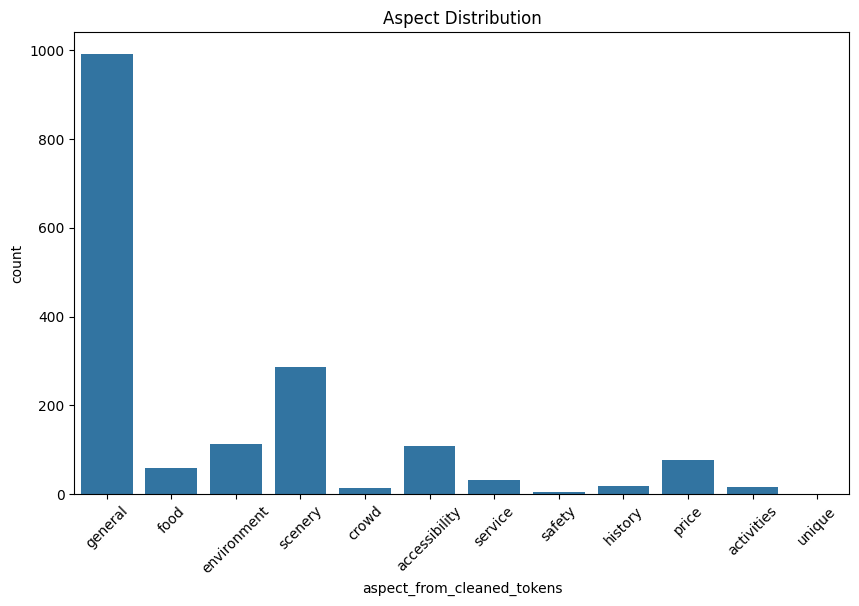

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 주제별 리뷰 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=data_exploded, x='aspect_from_cleaned_tokens')
plt.title("Aspect Distribution")
plt.xticks(rotation=45)
plt.show()


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 주제별로 감성 분석 수행
for topic in topics_keywords.keys():
    topic_data = data_exploded[data_exploded['aspect_from_cleaned_tokens'] == topic]
    
    # 데이터가 충분히 있는지 확인
    if len(topic_data) < 2:
        print(f"--- {topic} 주제의 데이터가 부족하여 학습을 건너뜁니다 ---")
        continue

    # 텍스트 데이터를 벡터로 변환
    X = vectorizer.fit_transform(topic_data['cleaned_tokens_str'])
    y = topic_data['sentiment']
    
    # 데이터가 충분하면 train_test_split 적용, 아니면 전체 데이터로 학습
    if len(topic_data) > 5:  # 데이터가 5개 이상일 때만 학습/테스트 데이터로 분리
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    else:
        X_train, X_test, y_train, y_test = X, X, y, y  # 데이터가 적을 경우 전체 사용

    # 로지스틱 회귀 모델 학습
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # 예측 및 성능 평가
    y_pred = model.predict(X_test)
    
    print(f"--- {topic} 주제의 감성 분석 ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))



--- service 주제의 감성 분석 ---
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.71      1.00      0.83         5

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7

--- environment 주제의 감성 분석 ---
Accuracy: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.87      1.00      0.93        20

    accuracy                           0.87        23
   macro avg       0.43      0.50      0.47        23
weighted avg       0.76      0.87      0.81        23

--- scenery 주제의 감성 분석 ---
Accuracy: 0.896551724137931
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.90      1.00      0.95        52

    accuracy  

c:\Users\CBNU\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CBNU\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CBNU\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier